<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/M%C3%A9todo_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import random as rd

Aciertos= 950
I= 0.6333333333333333


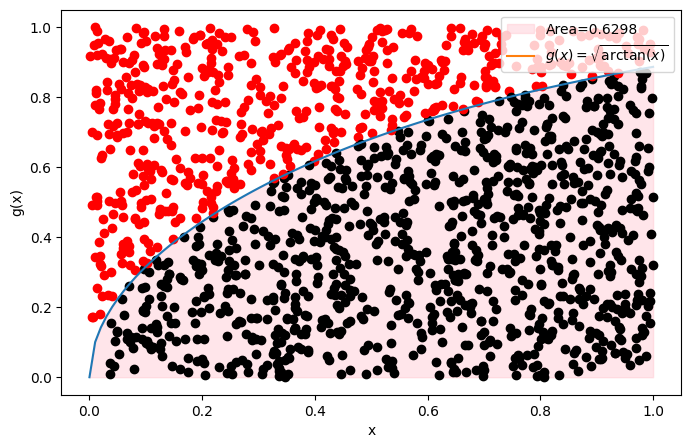

In [2]:
# Método de Monte Carlo

def g(x):
  return np.sqrt(np.arctan(x))

X = np.linspace(0,1,100)
Y = g(X)
aciertos=0
N=1500

a, b = 0, 1
area, error = quad(g,a,b) #Me ayuda con el area bajo la curva XD

plt.figure(figsize=(8,5))
plt.fill_between (X,Y,alpha=0.4, color="pink", label=f"Area={area:.4f}") #solo para colorear el área bajo la curva

plt.plot(X,Y)

for i in range (N):
  x = rd.random()
  y = rd.random()
  #plt.scatter(x,y, color="red")
  if y <= g(x): #Cuantos caen debajo de la curva
    plt.scatter(x,y,color="black")
    aciertos+=1
  else:
    plt.scatter(x,y,color="red")

plt.xlabel("x")
plt.ylabel("g(x)")
plt.plot(x,y,label=r"$g(x)= \sqrt{\arctan(x)}$")
print("Aciertos=",aciertos)

I=aciertos/N
print("I=",I)

plt.legend()
plt.show()